# Load Brouhaha results

In [9]:
import pandas as pd

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

## Load mean SNR and speech duration per audio files

```brouhaha_mean_results.csv``` contains the mean speech-to-noise ratio and the speech duration (both predicted by Brouhaha) for each audio files in the dataset.
- ```split``` in {'dev', 'eval', 'train'}
- ```nspeakers``` in {'0', '1', '2', '3', 'unlabeled'}
- ```filename``` = ```session``` _ ```ref_speaker``` _ ```mix```: audio file name with:
    - ```session```: CHiME session
    - ```ref_speaker```: ID of the participant with the microphone 
    - ```mix```: mix number
- ```audio_duration```: audio duration in seconds
- ```brouhaha_speech_duration```: total speech duration in seconds predicted by Brouhaha
- ```brouhaha_speech_percentage``` = ```brouhaha_speech_duration``` / ```audio_duration``` : speech percentage predicted by Brouhaha
- ```brouhaha_snr_mean```: mean SNR predicted by Brouhaha
- ```brouhaha_c50_mean```: mean C50 predicted by Brouhaha

In [10]:
brouhaha_results = pd.read_csv('brouhaha_mean_results.csv', index_col=0)
brouhaha_results

,split,nspeakers,filename,session,ref_speaker,mix,audio_duration,brouhaha_speech_duration,brouhaha_speech_percentage,brouhaha_snr_mean,brouhaha_c50_mean
dev/0/S02_P05_10.wav,dev,0,S02_P05_10,S02,P05,10,9.15,0.000,0.000000,-3.128032,23.220364
dev/0/S02_P05_11.wav,dev,0,S02_P05_11,S02,P05,11,3.90,0.000,0.000000,7.857205,24.311077
dev/0/S02_P05_12.wav,dev,0,S02_P05_12,S02,P05,12,7.43,0.000,0.000000,-3.600504,21.516619
dev/0/S02_P05_13.wav,dev,0,S02_P05_13,S02,P05,13,3.36,0.000,0.000000,0.770066,32.598824
dev/0/S02_P05_14.wav,dev,0,S02_P05_14,S02,P05,14,5.02,0.000,0.000000,2.349033,22.032469
...,...,...,...,...,...,...,...,...,...,...,...
train/unlabeled/S24_P56_95.wav,train,unlabeled,S24_P56_95,S24,P56,95,3.83,3.780,0.986945,9.466739,9.662007
train/unlabeled/S24_P56_96.wav,train,unlabeled,S24_P56_96,S24,P56,96,6.06,5.434,0.896700,3.592137,7.181939
train/unlabeled/S24_P56_97.wav,train,unlabeled,S24_P56_97,S24,P56,97,6.53,4.996,0.765084,3.384964,11.277267
train/unlabeled/S24_P56_98.wav,train,unlabeled,S24_P56_98,S24,P56,98,17.11,11.693,0.683402,10.851442,9.358819


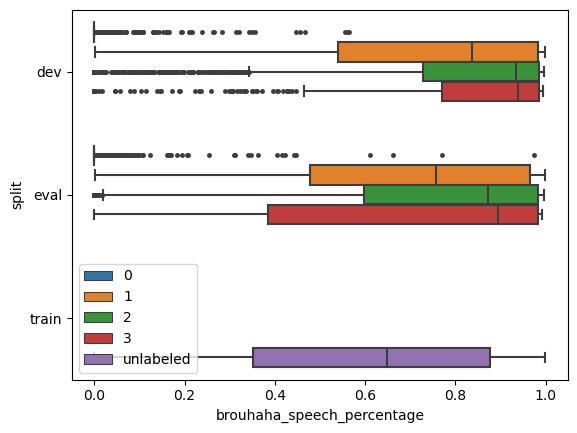

In [11]:
sns.boxplot(data=brouhaha_results, x='brouhaha_speech_percentage', y='split', hue='nspeakers', flierprops={"marker": "."})
plt.legend(loc='lower left')

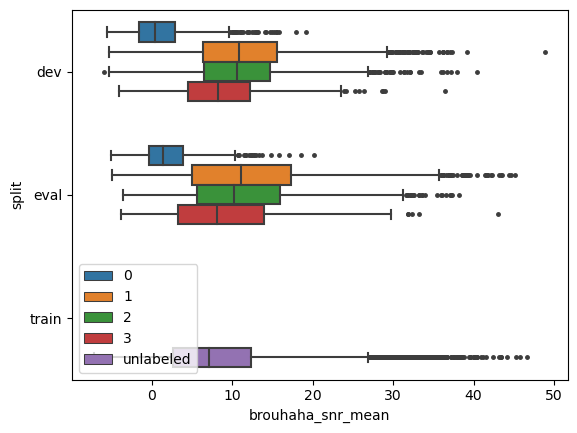

In [12]:
sns.boxplot(data=brouhaha_results, x='brouhaha_snr_mean', y='split', hue='nspeakers', flierprops={"marker": "."})
plt.legend(loc='lower left')

## Load estimated VAD and SNR (frame level)

```brouhaha_vad_snr.csv``` contains the frame-level voice activity detection and speech-to-noise ratio outputed by Brouhaha (with a frame duration of 0.016875ms):
- ```snr```: list of speech to noise ratio
- ```vad```: list of voice activity detection (0: no voice detected; 1: voice detected)

Each line corresponds to a different audio file (of duration ```d```) and each cell contains a list of size ```np.ceil(d/0.016875)```.

In [13]:
results = pd.read_csv('brouhaha_vad_snr.csv', index_col=0)
results

,snr,vad
eval/0/S01_P01_120.wav,"[2.57, 2.36, 2.1, 1.58, 1.31, 1.02, 0.54, 0.2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
eval/0/S01_P03_59.wav,"[4.71, 5.83, 2.13, 1.46, -0.79, -2.32, -2.85, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
eval/0/S01_P04_120.wav,"[4.36, 4.16, 3.82, 3.67, 3.73, 3.8, 3.43, 3.07...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
eval/0/S21_P46_131.wav,"[9.53, 10.78, 15.31, 18.52, 16.18, 14.74, 14.8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
eval/0/S21_P46_103.wav,"[-0.32, -0.91, -1.24, -1.37, -2.09, -2.55, -3....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
train/unlabeled/S08_P23_312.wav,"[6.5, 6.78, 6.8, 6.77, 6.61, 6.64, 6.61, 6.69,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
train/unlabeled/S04_P12_337.wav,"[19.47, 19.23, 19.13, 19.07, 18.96, 18.85, 18....","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
train/unlabeled/S03_P09_87.wav,"[8.38, 8.58, 8.66, 8.83, 8.67, 7.62, 8.31, 7.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
train/unlabeled/S04_P12_58.wav,"[14.76, 14.12, 13.83, 13.74, 13.39, 13.42, 12....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
# cells contains strings
type(results.iloc[0,0])

str

In [15]:
# convert strings in cells to list of float
def string_to_float_list(s):
    return [float(f) for f in s[1:-1].split(sep=', ')]

results = results.applymap(string_to_float_list)
type(results.iloc[0,0])

list

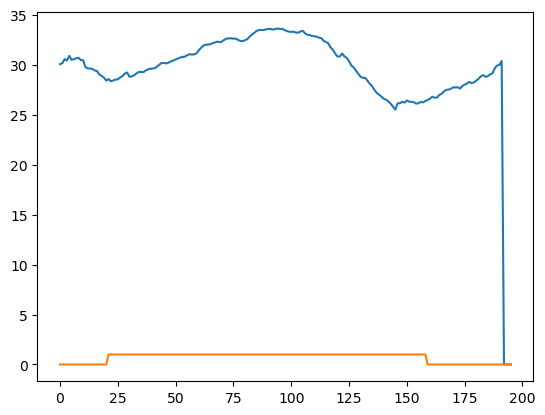

In [21]:
plt.plot(results.iloc[44575,0])
plt.plot(results.iloc[44575,1])